In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
# Load the dataset
df = pd.read_csv("Datasets/electricity_cost_dataset.csv")

In [13]:
df.head()

site area structure type  water consumption  recycling rate  \
0       1360      Mixed-use             2519.0              69   
1       4272      Mixed-use             2324.0              50   
2       3592      Mixed-use             2701.0              20   
3        966    Residential             1000.0              13   
4       4926    Residential             5990.0              23   

   utilisation rate  air qality index  issue reolution time  resident count  \
0                52               188                     1              72   
1                76               165                    65             261   
2                94               198                    39             117   
3                60                74                     3              35   
4                65                32                    57             185   

   electricity cost  
0            1420.0  
1            3298.0  
2            3115.0  
3            1575.0  
4            4301.0

In [14]:
df.isnull().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [15]:
df['structure type'].unique()

array(['Mixed-use', 'Residential', 'Commercial', 'Industrial'],
      dtype=object)

In [16]:
# Calculate mean of resident count excluding zeros
mean_resident = df.loc[df['resident count'] != 0, 'resident count'].mean()

In [17]:
mean_resident

142.83608746453012

In [18]:
df['resident count']= df['resident count'].replace(0 , mean_resident)

In [19]:
le =LabelEncoder()

In [20]:
df['structure type']=le.fit_transform(df['structure type'])

In [21]:
df.head()

site area  structure type  water consumption  recycling rate  \
0       1360               2             2519.0              69   
1       4272               2             2324.0              50   
2       3592               2             2701.0              20   
3        966               3             1000.0              13   
4       4926               3             5990.0              23   

   utilisation rate  air qality index  issue reolution time  resident count  \
0                52               188                     1            72.0   
1                76               165                    65           261.0   
2                94               198                    39           117.0   
3                60                74                     3            35.0   
4                65                32                    57           185.0   

   electricity cost  
0            1420.0  
1            3298.0  
2            3115.0  
3            1575.0  
4            4301.0

In [22]:
avg_cost = df.groupby('structure type')['electricity cost'].mean()

In [23]:
avg_cost

structure type
0    2812.206988
1    3397.109562
2    2304.945906
3    2992.465347
Name: electricity cost, dtype: float64

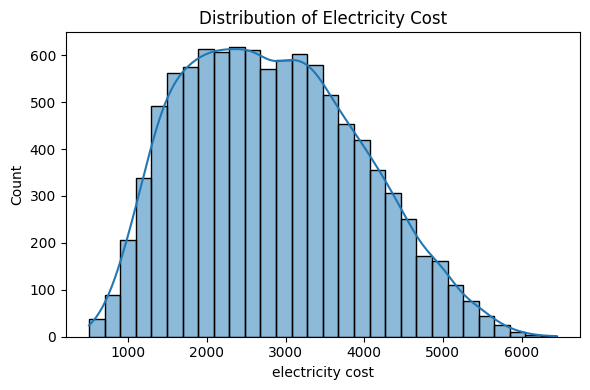

In [24]:
#Histogram of target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['electricity cost'], bins=30, kde=True)
plt.title("Distribution of Electricity Cost")
plt.tight_layout()
plt.show()

In [25]:
#Scatter plot: water consumption vs electricity cost
plt.figure(figsize=(6, 4))
sns.scatterplot(x='water consumption', y='electricity cost', data=df)
plt.title("water consumption vs Electricity Cost")
plt.tight_layout()
plt.show()

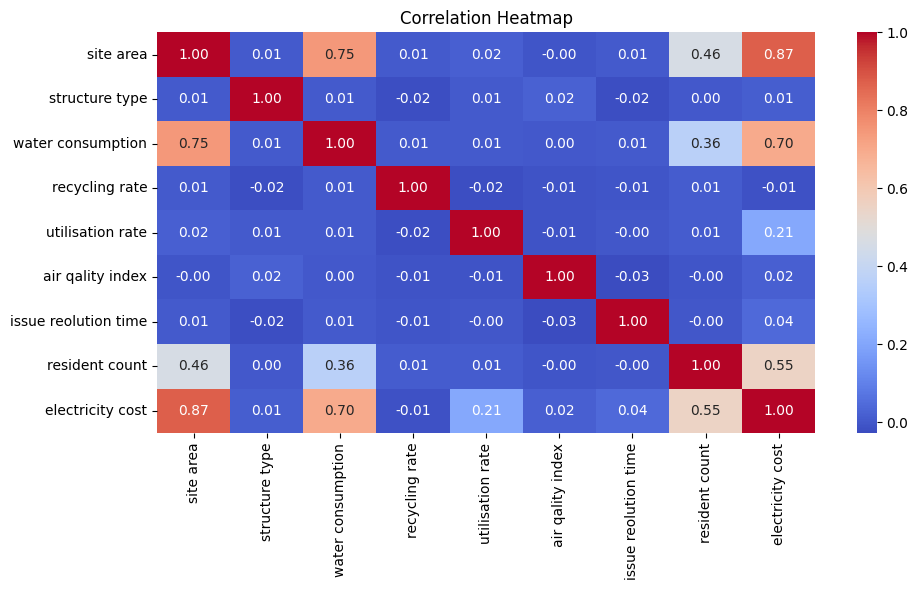

In [26]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [27]:
#Define input features and target
X = df.drop(columns=['electricity cost'])
y = df['electricity cost']

In [28]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict on test data
y_pred = model.predict(X_test)

In [31]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f'mae : {mae}')

mae : 337.71120593831324


In [33]:
print(f'mse : {mse}')

mse : 207194.55154510422


In [34]:
print(f'r2_score : {r2}')

r2_score : 0.8339112610770931


In [37]:
# Calculate adjusted R-squared
n = X_test.shape[0]  # number of test samples
k = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

print(f"Adjusted R-squared Score: {adjusted_r2:.4f}")

Adjusted R-squared Score: 0.8332


In [39]:
#Create a new feature: water consumption per resident. 
df['water_per_resident'] = df['water consumption'] / df['resident count']

In [40]:
df.head()

site area  structure type  water consumption  recycling rate  \
0       1360               2             2519.0              69   
1       4272               2             2324.0              50   
2       3592               2             2701.0              20   
3        966               3             1000.0              13   
4       4926               3             5990.0              23   

   utilisation rate  air qality index  issue reolution time  resident count  \
0                52               188                     1            72.0   
1                76               165                    65           261.0   
2                94               198                    39           117.0   
3                60                74                     3            35.0   
4                65                32                    57           185.0   

   electricity cost  water_per_resident  
0            1420.0           34.986111  
1            3298.0            8.904215  
2            3115.0           23.085470  
3            1575.0           28.571429  
4            4301.0           32.378378

In [41]:
#Define input features and target new model
X1 = df.drop(columns=['electricity cost'])
y1 = df['electricity cost']

In [42]:
#Train-Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [43]:
#Initialize and train model
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [45]:
X_test1

site area  structure type  water consumption  recycling rate  \
6252       1447               1             1000.0              22   
4684        865               3             1000.0              11   
1731       3131               3             4507.0              11   
4742       1058               0             1897.0              36   
4521       1053               3             1000.0              28   
...         ...             ...                ...             ...   
6412       2858               3             2950.0              58   
8285       4004               3             2144.0              29   
7853       2931               2             4554.0              18   
1095       3652               3             2120.0              56   
6929        604               3             1400.0              84   

      utilisation rate  air qality index  issue reolution time  \
6252                69               179                    65   
4684                97                69                    68   
1731                94                35                    26   
4742                89                19                    57   
4521                79                12                    61   
...                ...               ...                   ...   
6412                96               162                    46   
8285                62                33                    40   
7853                60                75                    51   
1095                43                53                    39   
6929                31                11                    14   

      resident count  water_per_resident  
6252      142.836087            7.001032  
4684       78.000000           12.820513  
1731      232.000000           19.426724  
4742      142.836087           13.280957  
4521       99.000000           10.101010  
...              ...                 ...  
6412      119.000000           24.789916  
8285      342.000000            6.269006  
7853       94.000000           48.446809  
1095      115.000000           18.434783  
6929       50.000000           28.000000  

[2000 rows x 9 columns]

In [46]:
# Predict on test data
y_pred1 = model1.predict(X_test1)

In [47]:
# Evaluation Metrics
mae = mean_absolute_error(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

In [48]:
mae

332.964514892489

In [49]:
mse

202702.82338032057

In [50]:
r2

0.837511864765318

In [52]:
# Calculate adjusted R-squared
n = X_test1.shape[0]  # number of test samples
k = X_test1.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

print(f"Adjusted R-squared Score: {adjusted_r2:.4f}")

Adjusted R-squared Score: 0.8368


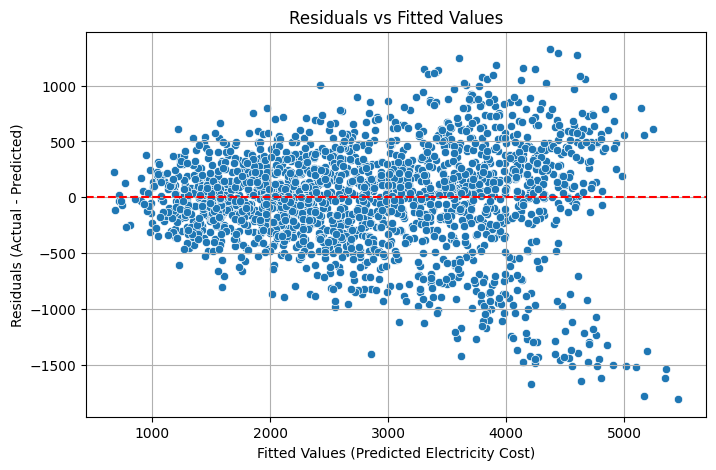

In [53]:
# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs Fitted (Predicted) Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted Electricity Cost)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()